In [1]:
#import pandas
#pip install pandas
import sys
!{sys.executable} -m pip install pandas
import pandas as pd

In [2]:
#reading file and get head.
df = pd.read_csv("car_data.csv")

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#to get shape of data
df.shape

(301, 9)

In [4]:
#to get all unique values in a column.
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [5]:
print(df.Transmission.unique())

['Manual' 'Automatic']


In [6]:
print(df.Fuel_Type.unique())

['Petrol' 'Diesel' 'CNG']


In [7]:
print(df['Owner'].unique())

[0 1 3]


In [8]:
#check missing or null values
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#check for na
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
#to get count of values, mean, std, min, max, 25% 50% and 75% percentile for numerical values.

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [16]:
df1 = df
#m = lambda x: 2020 -x
#df1['Age'] = map(m, df1['Year'])
df1['Age'] = 2020 - df1['Year']

In [17]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [19]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [20]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
from datetime import date

today = date.today()
current_yr = today.year
final_dataset['current_yr'] = today.year

c:\users\saurabh.singh\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
final_dataset['no_of_year'] = final_dataset['current_yr'] - final_dataset['Year']

In [23]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_yr,no_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [24]:
#to drop a column from a dataframe. inplace =True it to make the operation permanent.
final_dataset.drop(['Year', 'current_yr'], axis =1, inplace = True)

In [25]:
#get_dummies is a function inside python that is used to convertcategorical values to numerical or or one hot encoded.drop_forst = True is ued to remove refrence column after encoding.
final_dataset = pd.get_dummies(final_dataset, drop_first= True)

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [27]:
#to get the correlation of all features present inside he data use df.corr()
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [28]:
#to see the visual representation of correlation of varaibles
#if it does not import, go to anaconda prompt and choose current enviromnet and type pip install seaborn.
import seaborn as sns

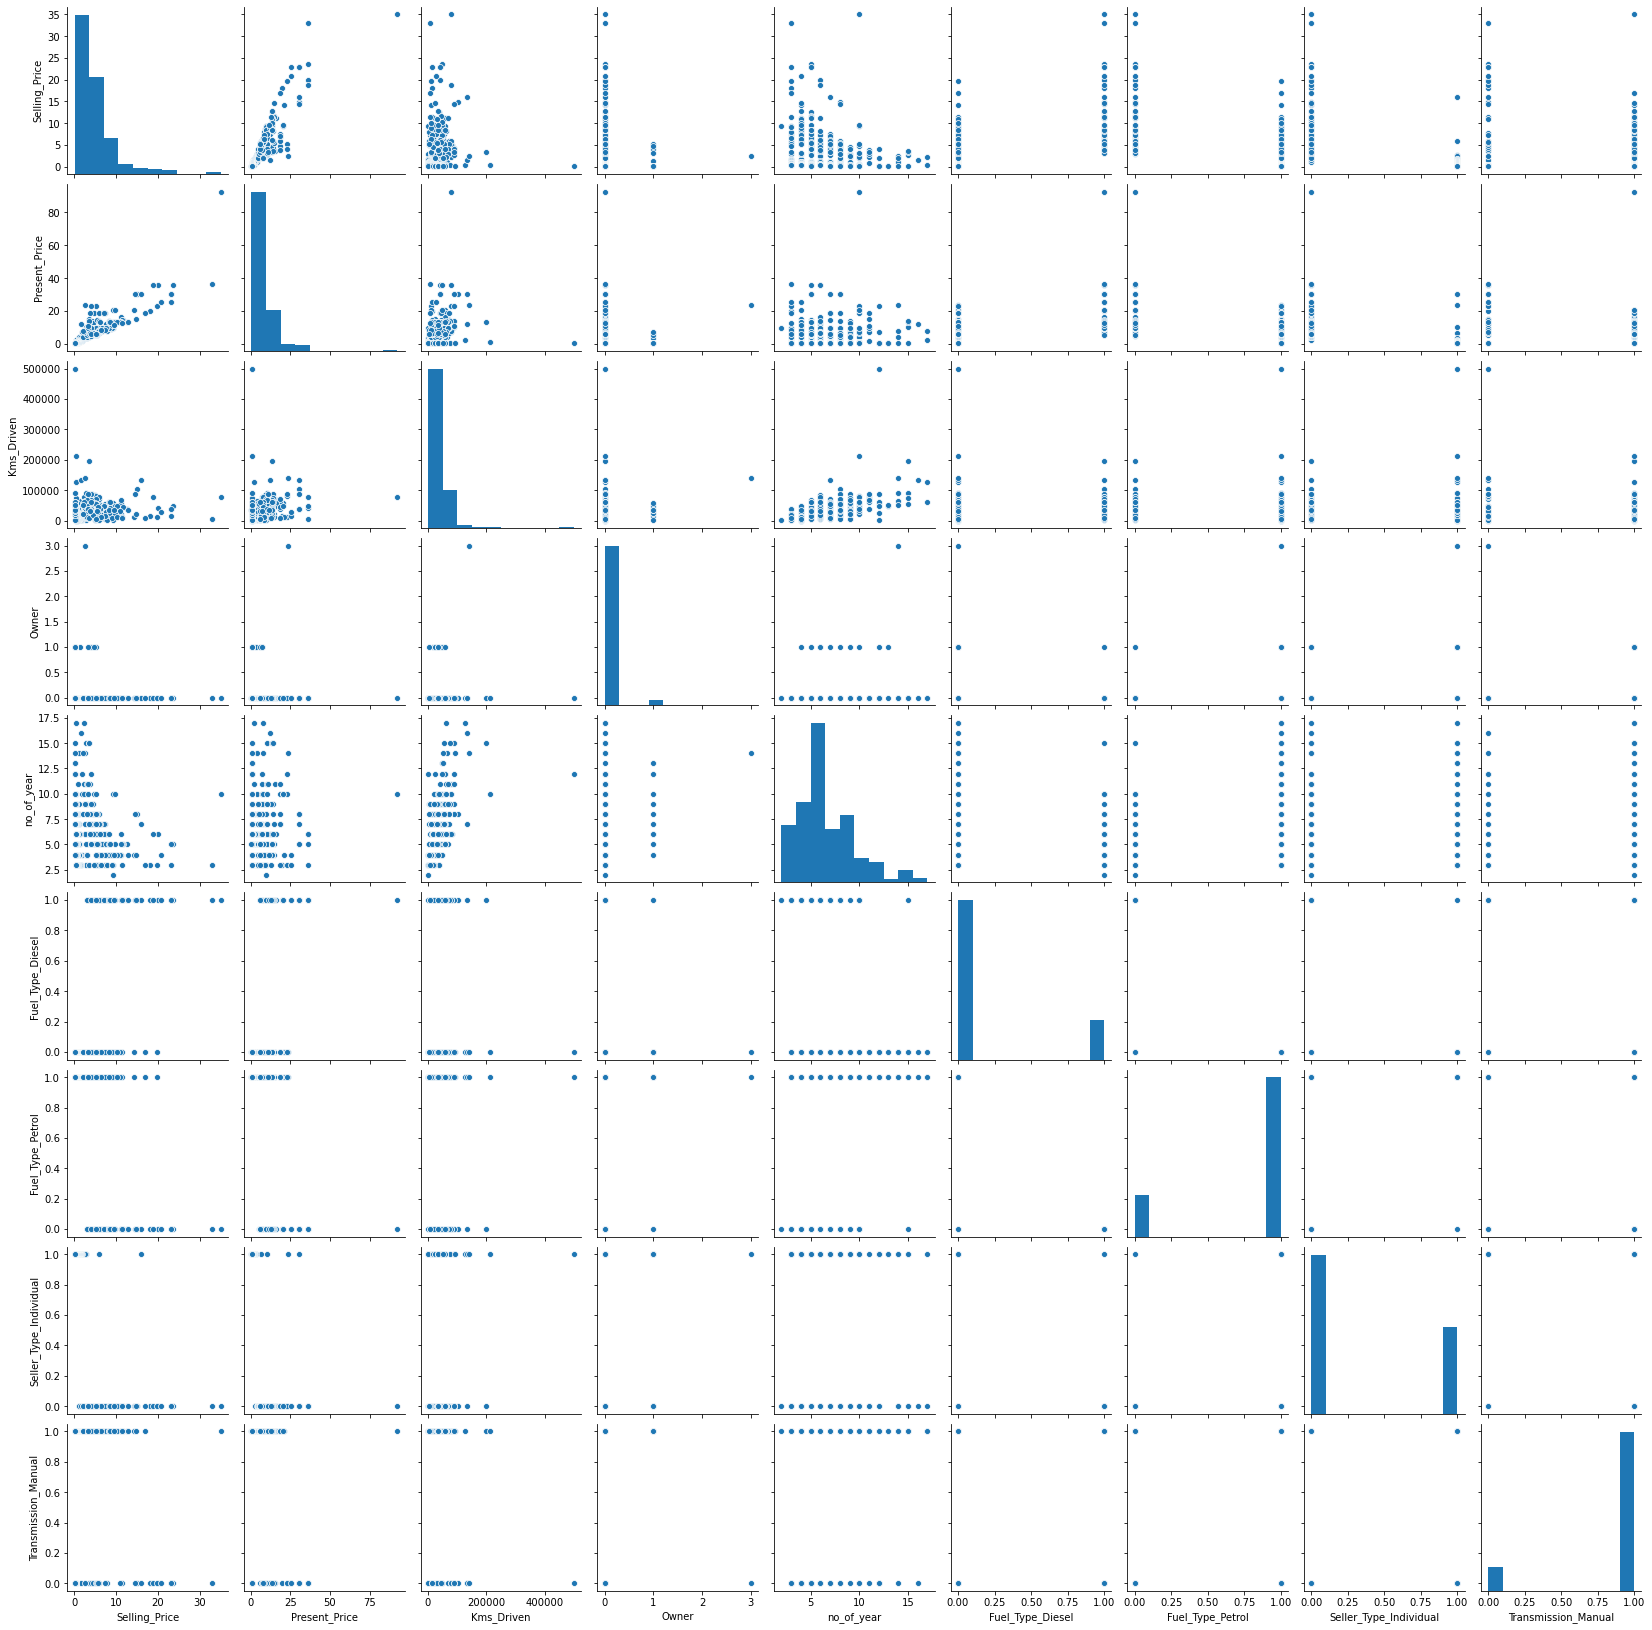

In [29]:
#it will give pair plot w.r.t to each and every feature.
sns.pairplot(final_dataset)

In [30]:
import matplotlib 

In [31]:
import sys
#!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

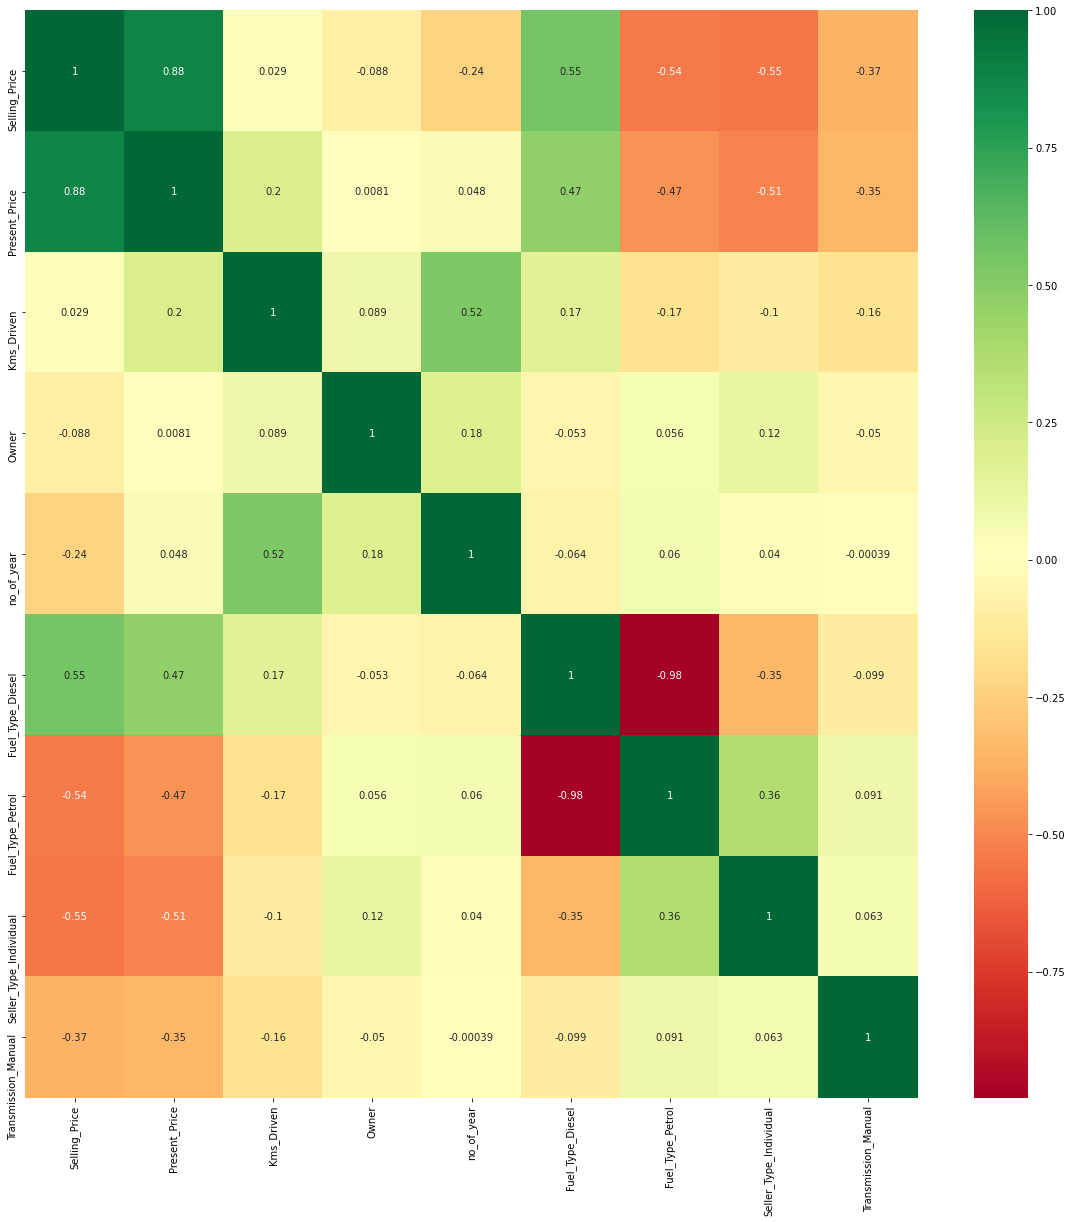

In [33]:
#plot in the form of a heatmap
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[final_dataset.columns].corr(),annot=True,cmap="RdYlGn")

In [34]:
#splitting the data into dependent and independent features
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [35]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [36]:
#Important features::: done by ExternalTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[0.36897957 0.03974523 0.00135398 0.07687391 0.23304923 0.00986204
 0.12193795 0.14819809]


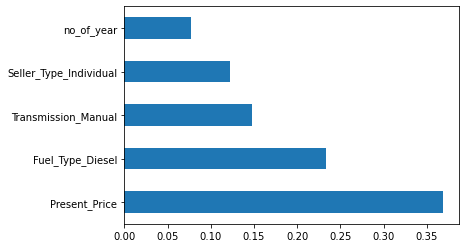

In [38]:
#TO plot it using better visualization use:
#to get  n largest in a series. use series.nlargest(4)
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(5).plot(kind = "barh")
plt.show()
#here present price, fuel type and transmission manual are 3 most important feature

In [39]:
#now we will train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [40]:
y_test.shape

(61,)

In [41]:
X_train.shape

(240, 8)

In [42]:
#We will use random forest regressor.
#random forest uses decision tree and in decision tree it is not required to scale features.
#A random forest is a meta estimator that fits a number of classifying
#decision trees on various sub-samples of the dataset and uses averaging
#to improve the predictive accuracy and control over-fitting.
#The sub-sample size is controlled with the `max_samples` parameter if
#`bootstrap=True` (default), otherwise the whole dataset is used to build
#each tree.
#random forest does hyper parameter tuning
#n_estimators is the no of decision trees and can be assigned different values. set default to 100.
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()
#random forest regressor used mse for estimation

In [43]:
#hyperparameters
import numpy as np
#np.linspace returns evenly spaced numbers in a specified range.requires start stop and num which gives no of values to be used.
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [44]:
#similarly we set arguments of all varaibles
#number of features to cosnider at every split
max_features = ['auto', 'sqrt']
#maximum no of levels in a tree. 
max_depth = [int(x) for x in np.linspace(5,30, num =6)]
#minimum no of samples required to split a node
min_samples_split = [2,5,10,15,100]
#minimum no of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [45]:
#we will implement randomized searced CV.  It selects best feature among the varaibles we have defined above
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#randomized search cv and grid search cv is used for hyper paramter tuning. Randomized searh cv is usually fast
#randomized search cv will select the best paramter out of this
#randomized search cv is passed as key value paits
random_grid = { "n_estimators" : n_estimators,
               "max_features" : max_features,
               "max_depth" : max_depth,
               "min_samples_split" : min_samples_split,
               "min_samples_leaf" : min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
#initialize a  random forest regressor. 
#we will use random search grid for hyper paramters
#for that we need to create a base model to tune
rf = RandomForestRegressor()

In [48]:
rf_random = RandomizedSearchCV(estimator = rf,  param_distributions= random_grid, scoring = "neg_mean_squared_error", n_iter=10, cv =5, verbose=2, random_state=42, n_jobs= 1)
#first paramter is the rf value which is randomregressor,  all the available parameters are passed in param_distribition, 
#scoring is neg mean squared error, no of iter =10, cv =5, verbose, cross validation = 5

In [49]:
#fit the randomized search cv using random grid and randomforest base model.
rf_random.fit(X_train, y_train)
#it will run with all the estimator along with cross validation
#verbose used to display the results.
#for hyper parameter tuning we use randomized search cv
#randomized search cv will return the best value for the model.
# all this paramters should be passed using key value pairs

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
predictions = rf_random.predict(X_test)

In [51]:
predictions

array([ 6.55008175,  7.81406671,  0.71482276,  4.43170979,  0.58381619,
        0.6990274 ,  5.41204469, 15.18398405,  2.87825681,  1.18756785,
        0.4235662 ,  5.40428285,  1.13861855,  1.9969327 ,  5.67682305,
        9.32093799,  4.72228414,  0.31465238,  0.39392023,  4.19163795,
        9.86023155,  3.50760415,  0.40897376,  0.60000075,  5.11691685,
        0.54962886,  4.71676311,  5.04308783,  5.57652266,  7.46209492,
        7.72602474,  2.7355391 ,  7.81948558,  5.22785417,  3.043008  ,
        3.89629913, 10.26522714,  0.4915466 ,  1.13889613,  5.3196998 ,
        5.49573399,  7.51577979,  0.42094447,  4.75546582, 21.4273531 ,
        3.4357147 ,  0.26545439,  3.10421664,  9.65336601,  1.1839933 ,
        4.98782291,  3.02763647,  9.48048383, 10.23955631,  4.03374306,
       10.09155919,  3.2533089 ,  9.5191133 ,  0.24130767,  1.14069632,
        1.1379185 ])

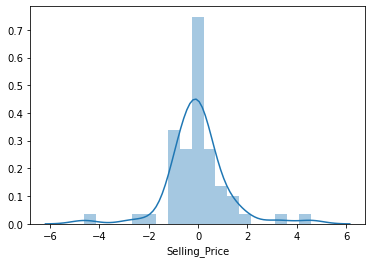

In [53]:
sns.distplot(y_test- predictions)
#the error seems to be normally distributed. hence the predictions made is good.

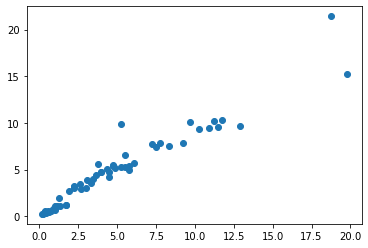

In [54]:
plt.scatter(y_test, predictions)
#even the plot is linearly distributed.
#cross validation - is to  change test data at each iteration that is done to validate the overall model.

In [56]:
#to get the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [57]:
rf_random.best_score_
#to get the best score

-4.074577165501079

In [61]:
#in order to get the model evaluation parameters use sklearn and import metrics
from sklearn import metrics

print("MAE =", metrics.mean_absolute_error(y_test, predictions))
print("MSE =", metrics.mean_squared_error(y_test, predictions))
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_test, predictions)))



MAE = 0.7344374321680284
MSE = 1.4398043915708822
RMSE = 1.1999184937198368


In [63]:
import pickle
#open a file where you want to store the data
file = open("random_forest_regression_model.pkl", "wb")

#dump information to that file
pickle.dump(rf_random, file)

#pickle file is a serialized file. It is used for deployment.
#we create a requiremnt file inorder to generate the file with all the package requiremnt for a pynb file
#syntax file
#pip freeze > Requirements.txt